# 라이브러리 Load

In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import nltk
from tqdm import tqdm

tqdm.pandas()

# Data Load

In [2]:
# Download in https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
df1 = pd.read_csv("IMDB Dataset.csv")
df1.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# def make_sentiment(row):
#     if row['sentiment'] == 'positive':
#         row['sentiment'] = 1
#         return row
#     else:
#         row['sentiment'] = 0
#         return row   

In [4]:
# df2 = df1.apply(make_sentiment, axis=1).copy()

In [5]:
df1['sentiment'] = df1['sentiment'].str.replace('positive', '1',regex=False)
df1['sentiment'] = df1['sentiment'].str.replace('negative','0',regex=False)

In [6]:
df1.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Tokenizer 구현 (Vocabulary dictionary)

## word_tokenize

In [205]:
from nltk.tokenize import sent_tokenize, word_tokenize

tokens = nltk.word_tokenize(df1['review'][0])

In [206]:
test1 = df1['review'][:10].progress_apply( nltk.word_tokenize)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 999.81it/s]


In [7]:
test1

NameError: name 'test1' is not defined

In [208]:
df2 = df1.copy()

In [209]:
df2['review'] = df1['review'].progress_apply( nltk.word_tokenize)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:11<00:00, 702.37it/s]


In [210]:
ww_lst = []
for ww in df2['review'].values:
    ww_lst += ww

In [221]:
ww_npy = np.array(ww_lst)
ww_npy, len(ww_npy)

(array(['One', 'of', 'the', ..., 'this', 'movie', '.'], dtype='<U76'),
 13974174)

In [212]:
uni = np.unique(ww_npy)
len(uni) # 너무 많음

194762

In [16]:
ww_dict = {}
ww_num_dict = {}
num = 0

# 정수 인코딩
for www in tqdm(ww_npy):
    if www.strip() in ww_dict.keys():
        ww_num_dict[www.strip()] += 1
        pass
    elif len(www.strip()) <= 3: # 길이가 3이하면 쓸모 없다고 생각.
        pass
    else:
        ww_dict[www.strip()] = num
        ww_num_dict[www.strip()] = 1
        num += 1

NameError: name 'ww_npy' is not defined

In [214]:
len(ww_dict.keys())  # 여전히 많음

187716

In [215]:
sorted(ww_num_dict.items(), key = lambda x: x[1], reverse = True)

[('that', 137744),
 ('this', 120442),
 ('with', 84743),
 ('movie', 83813),
 ('film', 75940),
 ('have', 56188),
 ('they', 38718),
 ('from', 38646),
 ('like', 37671),
 ('about', 33544),
 ('just', 32829),
 ('This', 29208),
 ('some', 28489),
 ('good', 27582),
 ('more', 27193),
 ('very', 26369),
 ('would', 26132),
 ('what', 25393),
 ('there', 24958),
 ('when', 23162),
 ('time', 22947),
 ('which', 22767),
 ('really', 22267),
 ('only', 22109),
 ('their', 22055),
 ('were', 21898),
 ('even', 21703),
 ('story', 21622),
 ('does', 19823),
 ('than', 19122),
 ('much', 18455),
 ('been', 18206),
 ('could', 18198),
 ('into', 17726),
 ('will', 17298),
 ('other', 17291),
 ('people', 17085),
 ('because', 16820),
 ('great', 16605),
 ('well', 15929),
 ('most', 15889),
 ('them', 15422),
 ('first', 15357),
 ('made', 15269),
 ('also', 15235),
 ('make', 15112),
 ('movies', 14409),
 ('think', 13984),
 ('characters', 13972),
 ('character', 13476),
 ('films', 13200),
 ('then', 13144),
 ('seen', 13037),
 ('watch', 

In [216]:
plot = sorted(ww_num_dict.values(), reverse = True)

### Zipf's law 

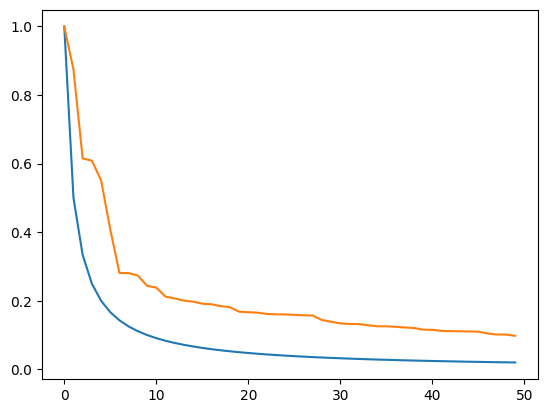

In [217]:
# Vocabulary dictionary를 만들 시 Zipf's law를 따라여 어느 정도 중요한 어구를 잘 나타내고 있다고 볼 수 있다.
# (그렇지 않으면 해당 token들은 전체 문서의 특성을 잘 못 나타낸다고 볼 수 있다.)
# 그림을 그려보니 해당 tokenize는 전체 문서의 특성을 잘 나타내지 못한다고 볼 수 있다.` 말고 다른 것을 사용해보자. : 그냥 Hard하게 하자.
import matplotlib.pyplot as plt

N = 50
M =0
max_freq = plot[M]

plt.plot(range(0, N), [1/i for i in range(1, N+1)])
plt.plot(range(0, N) ,[i/max_freq for i in plot[M:M+N]])

## 다시 토큰화 >WordPunctTokenizer



In [255]:
from nltk.tokenize import WordPunctTokenizer

In [256]:
df2_1 = df1.copy()

In [257]:
df2_1['review'] = df1['review'].progress_apply(WordPunctTokenizer().tokenize)

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:15<00:00, 3296.54it/s]


In [258]:
ww_lst_1 = []
for ww in df2_1['review'].values:
    ww_lst_1 += ww

In [259]:
ww_npy_1 = np.array(ww_lst_1)
ww_npy_1, len(ww_npy_1)

(array(['One', 'of', 'the', ..., 'this', 'movie', '.'], dtype='<U72'),
 14042379)

In [260]:
uni = np.unique(ww_npy_1)
len(uni) # 너무 많음

132460

In [261]:
ww_dict = {}
ww_num_dict = {}
num = 0

# 정수 인코딩
for www in tqdm(ww_npy_1):
    if www.strip() in ww_dict.keys():
        ww_num_dict[www.strip()] += 1
        pass
#     elif len(www.strip()) <= 3: # 길이가 3이하면 쓸모 없다고 생각.
#         pass
    else:
        ww_dict[www.strip()] = num
        ww_num_dict[www.strip()] = 1
        num += 1

100%|██████████████████████████████████████████████████████████████████| 14042379/14042379 [00:20<00:00, 670609.43it/s]


In [262]:
len(ww_dict.keys())  # 여전히 많음

132460

In [263]:
sorted(ww_num_dict.items(), key = lambda x: x[1], reverse = True)

[('the', 575014),
 (',', 518957),
 ('.', 460285),
 ('and', 310319),
 ('a', 309813),
 ('of', 285946),
 ('to', 264711),
 ("'", 257173),
 ('is', 209025),
 ('br', 201948),
 ('in', 174542),
 ('I', 164500),
 ('it', 154300),
 ('that', 138258),
 ('s', 123389),
 ('this', 120982),
 ('-', 109116),
 ('/><', 100974),
 ('"', 100693),
 ('/>', 97215),
 ('was', 94926),
 ('The', 89972),
 ('movie', 86608),
 ('as', 85138),
 ('with', 84962),
 ('for', 83094),
 ('film', 78689),
 ('.<', 72280),
 ('but', 69066),
 ('t', 67012),
 ('(', 66390),
 ('on', 65730),
 ('you', 62137),
 ('are', 57806),
 ('not', 55445),
 ('have', 54736),
 ('his', 54723),
 ('be', 52932),
 ('one', 48753),
 ('he', 48179),
 ('at', 43486),
 ('by', 43106),
 ('all', 42478),
 ('an', 41448),
 ('who', 40713),
 ('they', 38781),
 ('from', 38720),
 ('like', 38649),
 ('It', 36108),
 ('so', 35309),
 ('or', 34476),
 (')', 33781),
 ('about', 33724),
 ('out', 33712),
 ('her', 33392),
 ('just', 32894),
 ('has', 32827),
 ('This', 29525),
 ('some', 28542),
 ('

In [264]:
plot = sorted(ww_num_dict.values(), reverse = True)

### Zipf's law 

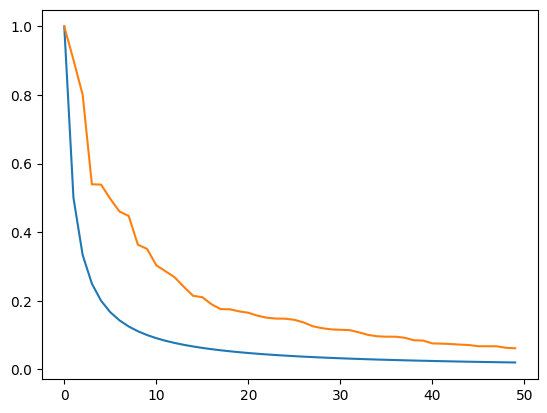

In [265]:
# Vocabulary dictionary를 만들 시 Zipf's law를 따라여 어느 정도 중요한 어구를 잘 나타내고 있다고 볼 수 있다.
# (그렇지 않으면 해당 token들은 전체 문서의 특성을 잘 못 나타낸다고 볼 수 있다.)
# 그림을 그려보니 해당 tokenize는 전체 문서의 특성을 잘 나타내지 못한다고 볼 수 있다.` 말고 다른 것을 사용해보자. : 그냥 Hard하게 하자.
import matplotlib.pyplot as plt

N = 50
M =0
max_freq = plot[M]

plt.plot(range(0, N), [1/i for i in range(1, N+1)])
plt.plot(range(0, N) ,[i/max_freq for i in plot[M:M+N]])

## 그냥 만들기

In [7]:
df3 = df1.copy()

In [8]:
df3['review'] = df1['review'].str.split()

In [9]:
import re

def remove_spec(text):
    pattern = r'[^a-zA-Z0-9]'
    # 정규식을 사용하여 특수문자를 제거하고 결과 반환
    return re.sub(pattern, '', text)

In [10]:
ww_lst_3 = []
for ww in df3['review'].values:
    ww_lst_3 += [remove_spec(www.lower().replace('.','')) for www in ww if len(www) >= 3]

In [11]:
ww_npy_3 = np.array(ww_lst_3)
uni = np.unique(ww_npy_3)
len(uni) ,len(ww_npy_3)# 너무 많음

(180495, 9312916)

### 표제어 추출 
- 2번 파일 실행시켜 보니 너무 성능이 안나옴 > 다시 token화를 보니깐 같은 기본 사전형 단어로부터 나온 단어들이 많음 (where, whereby, wherehow...)
- 이를 한 번에 볼 표제어를 추출.

### 어간 추출

- 동일한 어간을 갖는다고 생각하고도 진행. 표제어 추출은 사전에 있는 단어이며, 그 뿌리를 찾아서 (같은 곳으로부터 나옴; is,am,are > be) 추출시킴
- 어간 추츨은 포터알고리즘(규칙기반 접근)으로 진행되므로 사전에 없는 단어들이 포함될 수도 있음

In [12]:
ww_npy_3

array(['one', 'the', 'other', ..., 'avoid', 'this', 'movie'], dtype='<U72')

In [13]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# ww_npy_3_new = np.array([lemmatizer.lemmatize(word) for word in ww_npy_3])


stemmer = PorterStemmer()

ww_npy_3_new = np.array([stemmer.stem(word) for word in ww_npy_3])


In [14]:
len(ww_npy_3_new)

9312916

In [15]:
ww_dict = {}
ww_num_dict = {}
num = 0

# 정수 인코딩
for www in tqdm(ww_npy_3_new):
    if www.strip() in ww_dict.keys():
        ww_num_dict[www.strip()] += 1
        pass
    else:
        ww_dict[www.strip()] = num
        ww_num_dict[www.strip()] = 1
        num += 1

  0%|          | 0/9312916 [00:00<?, ?it/s]

100%|██████████| 9312916/9312916 [00:14<00:00, 652886.41it/s]


In [16]:
plot = sorted(ww_num_dict.values(), reverse = True)

### Zipf's law

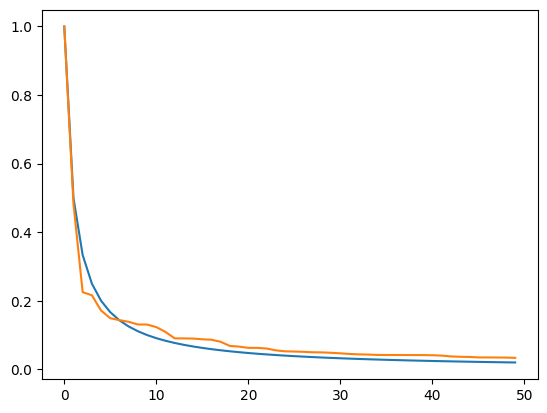

In [17]:
# 어느 정도 문헌 전체에 걸쳐서 해당 용어 사전들이 잘 분포하고 있음을 알 수 있다
# (정규분포처럼 정상적인 분포라면 Zipf's law를 만족하고 있다고 볼 수 있다. 단, 직접 Vocab을 만들 때는 이게 맞는데)
# 실제 BERT나 Transformer 같은 경우 의미가 없어질 수도 있다. (거기는 embedding 또한 학습이 되므로. 그리고 BertWordPieceTokenizer 
# 라는 것이 따로 있을 정도로 이미 구현이 다 되어있다. 여기서는 직접 처음부터 다 구현이므로 그냥 진행하기로 한다.

import matplotlib.pyplot as plt

N = 50
M =0
max_freq = plot[M]

plt.plot(range(0, N), [1/i for i in range(1, N+1)])
plt.plot(range(0, N) ,[i/max_freq for i in plot[M:M+N]])

## 소문자 기준 특수문자 포함 제거 (어퍼스토로피 포함 제외), 길이 3 이하 제거 시  Zipf's law을 만족하는 것을 볼 수 있다!

In [18]:
sorted(ww_dict.items(), key = lambda x: x[1], reverse = False)[:20]

[('one', 0),
 ('the', 1),
 ('other', 2),
 ('review', 3),
 ('ha', 4),
 ('mention', 5),
 ('that', 6),
 ('after', 7),
 ('watch', 8),
 ('just', 9),
 ('episod', 10),
 ('youll', 11),
 ('hook', 12),
 ('they', 13),
 ('are', 14),
 ('right', 15),
 ('thi', 16),
 ('exactli', 17),
 ('what', 18),
 ('happen', 19)]

In [19]:
max(ww_dict.values()) # 너무 수가 많다...
# .(너무 많으면 Embedding Vector로 참조시, 계산 시 시간이 많이 걸린다.) > 하위 20%는 버려보자.

142017

In [20]:
np.quantile(np.array(list(ww_num_dict.values())),0.8) 

6.0

In [21]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


In [22]:
ww_num_dict_new = {}
for i,j in ww_num_dict.items():
    if i.strip() in stop_words:
        continue
    
    if (j >= 3):
        ww_num_dict_new[i] = j

In [23]:
len(ww_num_dict_new.keys()) # 너무 수가 많다... > 훨씬 줄었다!!! > 이제 이대로 진행하자!

43000

In [24]:
ww_num_dict_new_2 =  dict(sorted(ww_num_dict_new.items(),reverse = True)) # 상위 30000개 단어만 사용

In [25]:
len(ww_num_dict_new_2) # 같은 어간, 어미를 가진 값들이 눈에 많이 띈다. > 이를 한꺼번에 합치는 방법은?

43000

In [26]:
ww_dict_final = {}

num = 3
for i,j in tqdm(ww_dict.items()):
    if i in ww_num_dict_new_2.keys():
        ww_dict_final[i] = num
        num += 1
    else:
        pass

100%|██████████| 142018/142018 [00:00<00:00, 1510479.53it/s]


In [27]:
ww_dict_final['[PAD]'] = 0
ww_dict_final['[SEP]'] = 1
ww_dict_final['[UNK]'] = 2

In [28]:
sorted(ww_dict_final.items(), key = lambda x: x[1], reverse = False)[:10]

[('[PAD]', 0),
 ('[SEP]', 1),
 ('[UNK]', 2),
 ('one', 3),
 ('review', 4),
 ('ha', 5),
 ('mention', 6),
 ('watch', 7),
 ('episod', 8),
 ('youll', 9)]

## word to label_encoding

- 딕셔너리를 만들었으니 이번에는 해당 word를 의미하는 label로 encoding 시키자.

In [29]:
len(ww_dict_final.keys())

43003

In [30]:
df3['label_encoded'] = 2

In [31]:
df3.head()

,review,sentiment,label_encoded
0,"[One, of, the, other, reviewers, has, mentione...",1,2
1,"[A, wonderful, little, production., <br, /><br...",1,2
2,"[I, thought, this, was, a, wonderful, way, to,...",1,2
3,"[Basically, there's, a, family, where, a, litt...",0,2
4,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",1,2


In [32]:
def make_label(row):
    lst = []
    for ww in row['review']:
        if len(ww) <= 2:
            continue
        else:
            ww2 =stemmer.stem(remove_spec(ww.lower().replace('.','')))
            if ww2 in ww_dict_final.keys():
                lst.append(ww_dict_final[ww2])
            else:
                lst.append(2) # Dictionary에 없을 시 [UNK] Token 넣음 (2)
             
    row['label_encoded'] = lst
    
    return row

In [33]:
df3_1 = df3.progress_apply(make_label,axis=1)

100%|██████████| 50000/50000 [03:44<00:00, 222.26it/s]


In [34]:
df3_1

,review,sentiment,label_encoded
0,"[One, of, the, other, reviewers, has, mentione...",1,"[3, 2, 2, 4, 5, 6, 2, 2, 7, 2, 8, 9, 10, 2, 2,..."
1,"[A, wonderful, little, production., <br, /><br...",1,"[142, 143, 144, 16, 16, 2, 145, 146, 147, 148,..."
2,"[I, thought, this, was, a, wonderful, way, to,...",1,"[205, 12, 20, 142, 206, 207, 208, 2, 209, 210,..."
3,"[Basically, there's, a, family, where, a, litt...",0,"[271, 2, 272, 2, 143, 273, 274, 275, 2, 276, 1..."
4,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",1,"[2, 312, 313, 2, 208, 314, 315, 316, 145, 7, 3..."
...,...,...,...
49995,"[I, thought, this, movie, did, a, down, right,...",1,"[205, 12, 281, 2, 2, 11, 370, 1132, 827, 4505,..."
49996,"[Bad, plot,, bad, dialogue,, bad, acting,, idi...",0,"[484, 217, 484, 219, 484, 369, 4423, 371, 2, 7..."
49997,"[I, am, a, Catholic, taught, in, parochial, el...",0,"[8237, 11335, 8013, 9668, 758, 13272, 11335, 3..."
49998,"[I'm, going, to, have, to, disagree, with, the...",0,"[743, 27, 2, 7507, 2, 2, 347, 511, 2, 141, 2, ..."


# 저장 후 ReLoad

In [35]:
#  # 잠깐 저장
# import pickle

# # 데이터 프레임 save
# with open('df3_1.pickle', 'wb') as f:
#     pickle.dump(df3_1, f, pickle.HIGHEST_PROTOCOL)
    
    
# # Vocabulary dictionary save
# with open('ww_dict_final.pickle', 'wb') as f:
#     pickle.dump(ww_dict_final, f, pickle.HIGHEST_PROTOCOL)

In [10]:
# import pickle

# # load
# with open('ww_dict_final.pickle', 'rb') as f:
#     ww_dict_final = pickle.load(f)
    
# # load
# with open('df3_1.pickle', 'rb') as f:
#     df3_1 = pickle.load(f)

In [35]:
df3_1

,review,sentiment,label_encoded
0,"[One, of, the, other, reviewers, has, mentione...",1,"[3, 3061, 4, 5, 6, 7, 8, 9, 10, 11, 12, 9207, ..."
1,"[A, wonderful, little, production., <br, /><br...",1,"[787, 172, 173, 2, 2, 2, 2, 175, 176, 842, 177..."
2,"[I, thought, this, was, a, wonderful, way, to,...",1,"[100, 244, 19, 30, 787, 172, 245, 2001, 246, 2..."
3,"[Basically, there's, a, family, where, a, litt...",0,"[318, 319, 787, 320, 74, 787, 173, 321, 2, 323..."
4,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",1,"[2, 364, 2, 852, 4, 247, 3061, 2, 842, 787, 36..."
...,...,...,...
49995,"[I, thought, this, movie, did, a, down, right,...",1,"[100, 244, 19, 329, 814, 787, 195, 18, 431, 2,..."
49996,"[Bad, plot,, bad, dialogue,, bad, acting,, idi...",0,"[565, 2, 565, 2, 565, 2, 5773, 2, 4, 827, 3094..."
49997,"[I, am, a, Catholic, taught, in, parochial, el...",0,"[100, 3742, 787, 10469, 14506, 852, 2, 12321, ..."
49998,"[I'm, going, to, have, to, disagree, with, the...",0,"[871, 338, 2001, 77, 2001, 9526, 23, 4, 405, 4..."
